In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow as pa
import pyarrow.parquet as pq
import geopandas as gpd
import seaborn as sns

#Packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
from scipy import stats
pd.set_option('display.max_columns', None)
import tensorflow as tf

In [6]:
df = pd.read_parquet('Datasets/july_16_flood_data.parquet.gzip')

In [7]:
df.shape[0]

2495293

In [8]:
df.head()

,Unnamed: 0,agricultureStructureIndicator,asOfDate,policyCount,dateOfLoss,elevatedBuildingIndicator,ratedFloodZone,houseWorship,locationOfContents,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,occupancyType,originalConstructionDate,originalNBDate,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,primaryResidenceIndicator,buildingDamageAmount,buildingDeductibleCode,netBuildingPaymentAmount,buildingPropertyValue,causeOfDamage,condominiumCoverageTypeCode,contentsDeductibleCode,netContentsPaymentAmount,disasterAssistanceCoverageRequired,ficoNumber,floodWaterDuration,floodproofedIndicator,floodEvent,iccCoverage,netIccPaymentAmount,nfipRatedCommunityNumber,nfipCommunityName,numberOfUnits,buildingReplacementCost,replacementCostBasis,stateOwnedIndicator,waterDepth,rentalPropertyIndicator,state,reportedCity,reportedZipCode,countyCode,censusTract,censusBlockGroupFips,latitude,longitude,id,proportionLeqOne,proportionLeqTwo,proportionLeqThree,proportionLeqFour,proportionLeqFive,proportionLeqSix,medWaterDepth,p25WaterDepth,p75WaterDepth,p90WaterDepth,diffMedWaterDepth,diff90WaterDepth
0,0,0,2020-01-22T16:55:53.194Z,1,1998-02-07 00:00:00+00:00,0,X,0,NaN,4.0,0,1.0,1963-01-01T00:00:00.000Z,1997-01-11T00:00:00.000Z,NaN,NaN,NaN,0,7,0,200000.0,50000.0,1998,0,382.0,0,0.00,937.0,1,N,0,0.0,0.0,612.0,0.0,0,Pineapple Express - Southern,15000.0,0.0,60294.0,"OCEANSIDE, CITY OF",1.0,937.0,A,0,0.0,0,CA,Currently Unavailable,92056.0,6073.0,6.073019e+09,6.073019e+10,33.2,-117.3,23dcb0d8-3e61-45bf-899f-b951946ce2ff,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,2020-01-22T16:55:53.194Z,1,2005-08-29 00:00:00+00:00,0,X,0,NaN,2.0,0,1.0,1967-07-01T00:00:00.000Z,1990-07-12T00:00:00.000Z,NaN,NaN,NaN,0,7,0,100000.0,40000.0,2005,1,NaN,0,0.00,NaN,1,N,0,0.0,0.0,654.0,0.0,0,Hurricane Katrina,30000.0,0.0,225203.0,NEW ORLEANS/ORLEANS PARISH*,1.0,NaN,A,0,0.0,0,LA,Currently Unavailable,70131.0,22071.0,2.207100e+10,2.207100e+11,29.9,-90.0,55783cdd-ccbd-4b19-930b-072def248507,0.928571,0.939560,0.939560,0.939560,0.950549,0.950549,0.0,0.0,1.0,1.0,0.0,-1.0
2,2,0,2020-01-22T16:55:53.194Z,1,1998-09-28 00:00:00+00:00,0,X,0,NaN,1.0,0,1.0,1972-01-01T00:00:00.000Z,1997-07-24T00:00:00.000Z,8813.21,1720.0,0.0,0,1,0,100000.0,50000.0,1998,1,9313.0,0,8813.21,80000.0,1,N,0,1720.0,0.0,133.0,0.0,0,Hurricane Georges (Panhandle),15000.0,0.0,120274.0,SANTA ROSA COUNTY *,1.0,100000.0,A,0,0.0,0,FL,Currently Unavailable,32566.0,12113.0,1.211301e+10,1.211301e+11,30.4,-86.9,bfb5922b-1b21-4882-b1d4-b3825ff53e37,0.888889,0.888889,0.888889,0.888889,1.000000,1.000000,0.0,0.0,0.0,1.0,0.0,-1.0
3,3,0,2019-09-19T13:45:58.425Z,1,1994-10-07 00:00:00+00:00,0,X,0,NaN,2.0,0,1.0,1960-01-01T00:00:00.000Z,1993-10-01T00:00:00.000Z,2906.00,0.0,0.0,0,7,0,100000.0,25000.0,1994,0,4428.0,0,2906.00,100000.0,1,N,0,0.0,0.0,NaN,0.0,0,None,NaN,0.0,450026.0,"BEAUFORT, CITY OF",1.0,0.0,A,0,0.0,0,SC,Currently Unavailable,29902.0,45013.0,4.501300e+10,4.501300e+11,32.4,-80.7,c1cf6e00-1e6d-4493-93fc-eb430ef15495,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,2019-09-19T13:45:58.425Z,1,1996-03-11 00:00:00+00:00,0,X,0,NaN,1.0,0,1.0,1988-01-01T00:00:00.000Z,1996-01-11T00:00:00.000Z,3875.53,1545.0,0.0,1,7,0,100000.0,25000.0,1996,1,5252.0,0,3875.53,100000.0,1,N,0,1545.0,0.0,NaN,0.0,0,None,NaN,0.0,125092.0,BREVARD COUNTY *,1.0,0.0,A,0,0.0,0,FL,Currently Unavailable,32940.0,12009.0,1.200906e+10,1.200906e+11,28.3,-80.7,cad8334c-13f2-4837-bdcf-e09591197ff7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df[(df['buildingPropertyValue'] >= 10000) & (df['buildingPropertyValue'] < 10000000)]

df = df[df['medWaterDepth'] < 20]

df['relativeDamage'] = df['buildingDamageAmount']/df['buildingPropertyValue']

df['relativeDamage'].replace([np.inf, -np.inf], np.nan, inplace=True)

df = df[df['relativeDamage'] <= 1]

df['dateOfLoss'] = pd.to_datetime(df['dateOfLoss'])
df['originalConstructionDate'] = pd.to_datetime(df['originalConstructionDate'], errors='coerce')
df['originalConstructionDate_year'] = df['originalConstructionDate'].dt.year

df['AgeofBuildinguntilflood'] = df['yearOfLoss'] - df['originalConstructionDate_year']

df = df[df['AgeofBuildinguntilflood']>=0]

df['bool95'] = df['proportionLeqOne'] >= .95
df['bool90'] = df['proportionLeqOne'] >= .9
df['bool80'] = df['proportionLeqOne'] >= .8
df['bool75'] = df['proportionLeqOne'] >= .75
df['bool50'] = df['proportionLeqOne'] >= .5

In [10]:
df.head()

,Unnamed: 0,agricultureStructureIndicator,asOfDate,policyCount,dateOfLoss,elevatedBuildingIndicator,ratedFloodZone,houseWorship,locationOfContents,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,occupancyType,originalConstructionDate,originalNBDate,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,primaryResidenceIndicator,buildingDamageAmount,buildingDeductibleCode,netBuildingPaymentAmount,buildingPropertyValue,causeOfDamage,condominiumCoverageTypeCode,contentsDeductibleCode,netContentsPaymentAmount,disasterAssistanceCoverageRequired,ficoNumber,floodWaterDuration,floodproofedIndicator,floodEvent,iccCoverage,netIccPaymentAmount,nfipRatedCommunityNumber,nfipCommunityName,numberOfUnits,buildingReplacementCost,replacementCostBasis,stateOwnedIndicator,waterDepth,rentalPropertyIndicator,state,reportedCity,reportedZipCode,countyCode,censusTract,censusBlockGroupFips,latitude,longitude,id,proportionLeqOne,proportionLeqTwo,proportionLeqThree,proportionLeqFour,proportionLeqFive,proportionLeqSix,medWaterDepth,p25WaterDepth,p75WaterDepth,p90WaterDepth,diffMedWaterDepth,diff90WaterDepth,relativeDamage,originalConstructionDate_year,AgeofBuildinguntilflood,bool95,bool90,bool80,bool75,bool50
0,0,0,2020-01-22T16:55:53.194Z,1,1998-02-07 00:00:00+00:00,0,X,0,NaN,4.0,0,1.0,1963-01-01 00:00:00+00:00,1997-01-11T00:00:00.000Z,NaN,NaN,NaN,0,7,0,200000.0,50000.0,1998,0,382.0,0,0.00,937.0,1,N,0,0.0,0.0,612.0,0.0,0,Pineapple Express - Southern,15000.0,0.0,60294.0,"OCEANSIDE, CITY OF",1.0,937.0,A,0,0.0,0,CA,Currently Unavailable,92056.0,6073.0,6.073019e+09,6.073019e+10,33.2,-117.3,23dcb0d8-3e61-45bf-899f-b951946ce2ff,1.000000,1.000000,1.000000,1.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.407684,1963.0,35.0,True,True,True,True,True
2,2,0,2020-01-22T16:55:53.194Z,1,1998-09-28 00:00:00+00:00,0,X,0,NaN,1.0,0,1.0,1972-01-01 00:00:00+00:00,1997-07-24T00:00:00.000Z,8813.21,1720.0,0.0,0,1,0,100000.0,50000.0,1998,1,9313.0,0,8813.21,80000.0,1,N,0,1720.0,0.0,133.0,0.0,0,Hurricane Georges (Panhandle),15000.0,0.0,120274.0,SANTA ROSA COUNTY *,1.0,100000.0,A,0,0.0,0,FL,Currently Unavailable,32566.0,12113.0,1.211301e+10,1.211301e+11,30.4,-86.9,bfb5922b-1b21-4882-b1d4-b3825ff53e37,0.888889,0.888889,0.888889,0.888889,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.116413,1972.0,26.0,False,False,True,True,True
3,3,0,2019-09-19T13:45:58.425Z,1,1994-10-07 00:00:00+00:00,0,X,0,NaN,2.0,0,1.0,1960-01-01 00:00:00+00:00,1993-10-01T00:00:00.000Z,2906.00,0.0,0.0,0,7,0,100000.0,25000.0,1994,0,4428.0,0,2906.00,100000.0,1,N,0,0.0,0.0,NaN,0.0,0,None,NaN,0.0,450026.0,"BEAUFORT, CITY OF",1.0,0.0,A,0,0.0,0,SC,Currently Unavailable,29902.0,45013.0,4.501300e+10,4.501300e+11,32.4,-80.7,c1cf6e00-1e6d-4493-93fc-eb430ef15495,1.000000,1.000000,1.000000,1.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044280,1960.0,34.0,True,True,True,True,True
4,4,0,2019-09-19T13:45:58.425Z,1,1996-03-11 00:00:00+00:00,0,X,0,NaN,1.0,0,1.0,1988-01-01 00:00:00+00:00,1996-01-11T00:00:00.000Z,3875.53,1545.0,0.0,1,7,0,100000.0,25000.0,1996,1,5252.0,0,3875.53,100000.0,1,N,0,1545.0,0.0,NaN,0.0,0,None,NaN,0.0,125092.0,BREVARD COUNTY *,1.0,0.0,A,0,0.0,0,FL,Currently Unavailable,32940.0,12009.0,1.200906e+10,1.200906e+11,28.3,-80.7,cad8334c-13f2-4837-bdcf-e09591197ff7,1.000000,1.000000,1.000000,1.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052520,1988.0,8.0,True,True,True,True,True
5,5,0,2020-01-22T16:55:53.194Z,1,1998-02-03 00:00:00+00:00,1,AE,0,NaN,1.0,0,1.0,1970-01-01 00:00:00+00:00,1995-12-03T00:00:00.000Z,14985.92,1510.0,0.0,0,1,0,88000.0,12600.0,1998,0,15735.0,9,14985.92,66000.0,1,N,9,1510.0,0.0,119.0,0.0,0,Flooding,15000.0,0.0,515531.0,"VIRGINIA BEACH, CITY OF",1.0,88000.0,A,0,0.0,0,VA,Currently Unavailable,23451.0,51810.0,5.181004e+10,5.181004e+11,36.9,-76.0,60206e0f-ca42-40e0-b82c-d1d78c21c826,1.000000,1.000000,1.000000,1.000000,1.0,1.0,0.0,0.0,1

In [11]:
# Assuming 'df' is your DataFrame and 'elevationDifference' is the column name

# # Step 1: Impute missing values with mean imputation
# mean_imputation = df['elevationDifference'].mean()
# df['elevationDifference'] = df['elevationDifference'].fillna(mean_imputation)

# # Step 2: Remove outliers
# z_scores = np.abs((df['elevationDifference'] - df['elevationDifference'].mean()) / df['elevationDifference'].std())
# threshold = 3  # Adjust the threshold as needed
# df = df[z_scores <= threshold]

# # Step 3: Create categorical bins
# num_bins = 10
# df['elevationDifference_category'] = pd.cut(df['elevationDifference'], bins=num_bins, labels=False)

# # Optional: Rename the categories to meaningful labels
# category_labels = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5',
#                    'Category 6', 'Category 7', 'Category 8', 'Category 9', 'Category 10']
# df['elevationDifference_category'] = df['elevationDifference_category'].map(lambda x: category_labels[x])

KeyError: 'elevationDifference'

In [80]:
desired_variables = ['waterDepth', 'floodEvent', 'ratedFloodZone', 
                     'causeOfDamage', 'yearOfLoss', 'state',  'relativeDamage',
                     'AgeofBuildinguntilflood',
                     'postFIRMConstructionIndicator', 'occupancyType' , 
                     'floodproofedIndicator', 'rateMethod', 'proportionLeqOne', 
                     'bool75', 'bool50', 'bool80', 'bool90', 'medWaterDepth']

df_new = df[desired_variables]

In [81]:
# Specify the variables to one-hot encode
variables_to_encode = ['floodEvent', 'ratedFloodZone', 
                       'causeOfDamage', 'state', 'yearOfLoss', 
                       'occupancyType', 'floodproofedIndicator', 'rateMethod']

#variables excluding: smallBusinessIndicatorBuilding', 'buildingDamageAmount', ,'stateOwnedIndicator', 'rateMethod', 'rentalPropertyIndicator' , floodWaterDuration 
#, 'p75WaterDepth',  'p90WaterDepth','diff90WaterDepth' 'proportionLeqTwo',
      # 'proportionLeqThree', 'proportionLeqFour', 'proportionLeqFive',
      # 'proportionLeqSix','p25WaterDepth', 'originalConstructionDateYear',  'diffMedWaterDepth', 'medWaterDepth'

# Perform one-hot encoding
df_encoded = pd.get_dummies(df_new, columns=variables_to_encode)

# Include the non-one-hot encoded variables from the original dataframe
variables_to_include = ['waterDepth', 'AgeofBuildinguntilflood',   'postFIRMConstructionIndicator', 'relativeDamage', 'proportionLeqOne',  'bool75', 'bool50', 'bool80', 'bool90', 'medWaterDepth']
# variables_to_include = ['waterDepth', 'AgeofBuildinguntilflood',   'postFIRMConstructionIndicator', 'relativeDamage', 'bool75', 'bool50', 'bool80', 'bool90', 'medWaterDepth']
df_encoded[variables_to_include] = df_encoded[variables_to_include]

In [82]:
df_copy = df_encoded.copy()

In [83]:
from sklearn.preprocessing import StandardScaler

# Specify the variables to normalize
variables_to_normalize = ['AgeofBuildinguntilflood', 'relativeDamage', 'proportionLeqOne',  'medWaterDepth']
# variables_to_normalize = ['AgeofBuildinguntilflood', 'relativeDamage',  'medWaterDepth']

# Create a scaler object
scaler = StandardScaler()

# Normalize the variables
df_encoded[variables_to_normalize] = scaler.fit_transform(df_encoded[variables_to_normalize])

In [84]:
df_copy_6ft = df_copy[df_copy['waterDepth']==6].copy()
df_copy_6ft.drop(['waterDepth'], axis=1, inplace=True)

In [85]:
df_train_inches = df_encoded[(df_encoded['waterDepth'] == 1) | (df_encoded['waterDepth'] == 0)].copy()
df_train_feet = df_encoded[(df_encoded['waterDepth'] == 5) | (df_encoded['waterDepth'] == 7)].copy()
df_6ft = df_encoded[df_encoded['waterDepth'] == 6].copy()

In [86]:
df_train_inches.drop(['waterDepth'], axis=1, inplace=True)
df_train_feet.drop(['waterDepth'], axis=1, inplace=True)
df_6ft.drop(['waterDepth'], axis=1, inplace=True)

In [87]:
df_copy_6ft.shape[0]

34959

In [88]:
df_6ft.shape[0]

34959

In [89]:
df_train_inches = df_train_inches.sample(n=1600, random_state=42)

df_train_feet = df_train_feet.sample(n=8000, random_state=42)

df_train_inches = df_train_inches.reset_index().drop(columns='index')
df_train_feet = df_train_feet.reset_index().drop(columns='index')

y_inches = np.ones(df_train_inches.shape[0], dtype=int)
y_feet = np.zeros(df_train_feet.shape[0], dtype=int)

# Concatenate df_train_inches and df_train_feet into df_train
df_train = pd.concat([df_train_inches, df_train_feet])

# Concatenate y_inches and y_feet into y
y = np.concatenate([y_inches, y_feet])

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=0.20, random_state=42)

### XGBOD

In [91]:
from pyod.models.xgbod import XGBOD

xgbod = XGBOD(random_state=42, base_score = 0.2)
xgbod.fit(X_train,y_train)

C:\Users\Asus\anaconda3\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


[18:35:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



XGBOD(base_score=0.2, booster='gbtree', colsample_bylevel=1,
   colsample_bytree=1,
   estimator_list=[KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=1, p=2,
  radius=1.0), LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=1, no...x_features=1.0,
    max_samples='auto', n_estimators=200, n_jobs=1, random_state=42,
    verbose=0)],
   gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
   min_child_weight=1, n_estimators=100, n_jobs=1, nthread=None,
   objective='binary:logistic', random_state=42, reg_alpha=0, reg_lambda=1,
   scale_pos_weight=1, silent=True,
   standardization_flag_list=[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, 

In [92]:
y_train_pred = xgbod.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = xgbod.decision_scores_  # raw outlier scores
y_train_scores = xgbod.decision_function(X_train)
# get the prediction on the test data
y_test_pred = xgbod.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = xgbod.decision_function(X_test)  # outlier scores

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic. 
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_train_pred))
print("The test data:", count_stat(y_test_pred))

The training data: {0: 6886, 1: 794}
The test data: {0: 1719, 1: 201}


In [93]:
Actual_pred = pd.DataFrame({'Actual': y_test, 'Pred': y_test_pred})
pd.crosstab(Actual_pred['Actual'],Actual_pred['Pred'])

Pred,0,1
Actual,,
0,1564,27
1,155,174


In [94]:
df_train_new = pd.DataFrame(X_train)
df_columns = df_train_new.columns
df_train_new['pred'] = y_train_pred
df_train_new['Group'] = np.where(df_train_new['pred']==1, 'Outlier','Normal')

# Now let's show the summary statistics:
cnt = df_train_new.groupby('Group')['pred'].count().reset_index().rename(columns={'pred':'Count'})
cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
stat = df_train_new.groupby('Group').mean().reset_index() # The avg.
cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together

,Group,Count,Count %,relativeDamage,AgeofBuildinguntilflood,postFIRMConstructionIndicator,proportionLeqOne,bool75,bool50,bool80,bool90,medWaterDepth,floodEvent_2021 Mid-Spring Severe Storms,floodEvent_Arizona Burn Scar Flash Flooding,floodEvent_Blizzard of 1993,floodEvent_California Atmospheric River,floodEvent_Colorado Burn Scar Flash Flooding,floodEvent_Dallas Flash Floods,floodEvent_Death Valley Flash Floods,floodEvent_December Storm - Nor'easter,floodEvent_Early summer severe storms,floodEvent_Early summer storms,floodEvent_Early winter storms,floodEvent_Fall 2018 Texas Flooding,floodEvent_Fall severe storms,floodEvent_Flooding,floodEvent_Greater New Orleans Flooding,floodEvent_Heavy rains,floodEvent_Hurricane Alex,floodEvent_Hurricane Alicia,floodEvent_Hurricane Allen,floodEvent_Hurricane Andrew,floodEvent_Hurricane Bertha,floodEvent_Hurricane Bob,floodEvent_Hurricane Bonnie,floodEvent_Hurricane Chantel,floodEvent_Hurricane Charley,floodEvent_Hurricane Cindy,floodEvent_Hurricane Claudette,floodEvent_Hurricane Danielle,floodEvent_Hurricane Danny,floodEvent_Hurricane Delta,floodEvent_Hurricane Dennis,floodEvent_Hurricane Diana,floodEvent_Hurricane Dolly,floodEvent_Hurricane Earl,floodEvent_Hurricane Elena,floodEvent_Hurricane Elsa,floodEvent_Hurricane Emily,floodEvent_Hurricane Eta,floodEvent_Hurricane Fiona,floodEvent_Hurricane Florence,floodEvent_Hurricane Floyd,floodEvent_Hurricane Fran,floodEvent_Hurricane Frances,floodEvent_Hurricane Frederic,floodEvent_Hurricane Georges,floodEvent_Hurricane Georges (Keys),floodEvent_Hurricane Georges (Panhandle),floodEvent_Hurricane Gilbert,floodEvent_Hurricane Gloria,floodEvent_Hurricane Gordon,floodEvent_Hurricane Gustav,floodEvent_Hurricane Hanna,floodEvent_Hurricane Harvey,floodEvent_Hurricane Hermine,floodEvent_Hurricane Hortense,floodEvent_Hurricane Hugo,floodEvent_Hurricane Ian,floodEvent_Hurricane Ida,floodEvent_Hurricane Ike,floodEvent_Hurricane Iniki,floodEvent_Hurricane Irene,floodEvent_Hurricane Irma,floodEvent_Hurricane Isaac,floodEvent_Hurricane Isabel,floodEvent_Hurricane Isaias,floodEvent_Hurricane Iselle,floodEvent_Hurricane Ivan,floodEvent_Hurricane Jeanne,floodEvent_Hurricane Jerry,floodEvent_Hurricane Josephine,floodEvent_Hurricane Juan,floodEvent_Hurricane Kate,floodEvent_Hurricane Katrina,floodEvent_Hurricane Lane,floodEvent_Hurricane Laura,floodEvent_Hurricane Lili,floodEvent_Hurricane Maria,floodEvent_Hurricane Marilyn,floodEvent_Hurricane Matthew,floodEvent_Hurricane Michael,floodEvent_Hurricane Nicole,floodEvent_Hurricane Opal,floodEvent_Hurricane Ophelia,floodEvent_Hurricane Rita,floodEvent_Hurricane Sally,floodEvent_Hurricane Sandy,floodEvent_Hurricane Wilma,floodEvent_Hurricane Zeta,floodEvent_Hurricanes David & Frederic,floodEvent_Late July Flooding,floodEvent_Late spring severe storms,floodEvent_Late spring storms,floodEvent_Late summer storms,floodEvent_Late winter severe storms,floodEvent_Late winter storms,floodEvent_Low pressure system,floodEvent_March 2019 Midwest Flooding,floodEvent_March storm,floodEvent_Mid-Winter California Flooding,floodEvent_Mid-spring storms,floodEvent_Mid-summer severe storms,floodEvent_Midwest Flooding,floodEvent_Nor'easter,floodEvent_Not a named storm,floodEvent_October severe storms,floodEvent_Pineapple Express - Southern,floodEvent_Severe Storms and Flooding,floodEvent_Severe flooding,floodEvent_Spring Storm,floodEvent_Spring severe storms,floodEvent_Spring storm,floodEvent_Storm,floodEvent_Summer severe storms,floodEvent_Tennessee Flash Flooding,floodEvent_Tennessee Flooding,floodEvent_Texas Severe Winter Storms,"floodEvent_The ""Halloween"" Storm",floodEvent_The 'No-Name Storm',floodEvent_Thunderstorms,floodEvent_Torrential Rain,floodEvent_Torrential rain,floodEvent_Tropical Storm Alberto,floodEvent_Tropical Storm Alex,floodEvent_Tropical Storm Allison,floodEvent_Tropical Storm Barry,floodEvent_Tropical Storm Beta,floodEvent_Tropical Storm Bill,floodEvent_Tropical Storm Claudette,floodEvent_Tropical Storm Debby,floodEv

In [96]:
# get the prediction on the 6ft data
y_6ft_pred = xgbod.predict(df_6ft)  # outlier labels (0 or 1)
y_6ft_scores = xgbod.decision_function(df_6ft)  # outlier scores

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic. 
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The test data:", count_stat(y_6ft_pred))
print(y_6ft_scores)

The test data: {0: 34088, 1: 871}
[0.07757159 0.03561416 0.00103033 ... 0.02631278 0.0752781  0.04683924]


In [97]:
mask = y_6ft_pred == 1

mask_inliers = y_6ft_pred == 0

# Apply the mask to filter the DataFrame
filtered_df = df_copy_6ft[mask]

filtered_df_inliers = df_copy_6ft[mask_inliers]

In [98]:
filtered_df['relativeDamage'].mean()

0.1510169440051342

In [99]:
filtered_df['proportionLeqOne'].median()

0.8333333333333334

In [100]:
filtered_df_inliers['relativeDamage'].mean()

0.39800566568658413

In [101]:
df_copy_6ft['relativeDamage'].mean()

0.39185196630775343

In [102]:
df_copy_6ft['proportionLeqOne'].mean()

0.27871207879067894

C:\Users\Asus\AppData\Local\Temp\ipykernel_17976\2681024777.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['bins'] = pd.cut(filtered_df['proportionLeqOne'], bins=bin_edges)


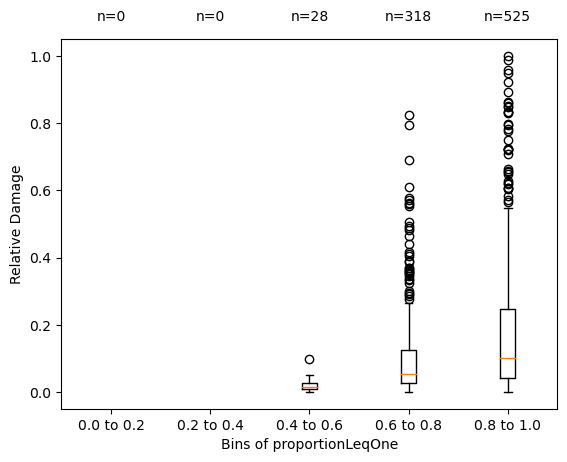

In [103]:
# Define the number of bins and the bin edges

# Define the bin edges
bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1]

# Cut the data into bins
filtered_df['bins'] = pd.cut(filtered_df['proportionLeqOne'], bins=bin_edges)

# Group the data by the bins
grouped_data = filtered_df.groupby('bins')

# Create a figure and axis for the boxplots
fig, ax = plt.subplots()

# Create a list to store the positions of each boxplot
positions = []

# Store the labels for the bins
bin_labels = []

# Iterate over the groups and create boxplots
for i, (group, data) in enumerate(grouped_data):
    positions.append(i+1)
    # count the number of observations in the bin
    num_observations = len(data)
    # create the label for the bin
    bin_label = f'{group.left:.1f} to {group.right:.1f}'
    bin_labels.append(bin_label)
    ax.boxplot(data['relativeDamage'], positions=[i+1])
    
    # Annotate number of observations at the very top of the figure
    ax.text(i+1, 1.05, f'n={num_observations}', ha='center', transform=ax.get_xaxis_transform())

# Set the x-axis labels
ax.set_xticks(positions)
ax.set_xticklabels(bin_labels)

# Set the x-axis label
ax.set_xlabel('Bins of proportionLeqOne')

# Set the y-axis label
ax.set_ylabel('Relative Damage')


# Show the plot
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_17976\51575920.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_inliers['bins'] = pd.cut(filtered_df_inliers['proportionLeqOne'], bins=bin_edges)


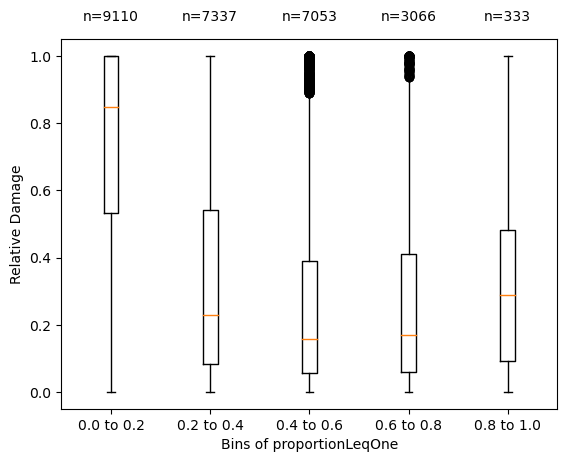

In [104]:
# Define the number of bins and the bin edges
# Define the bin edges
bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1]

# Cut the data into bins
filtered_df_inliers['bins'] = pd.cut(filtered_df_inliers['proportionLeqOne'], bins=bin_edges)

# Group the data by the bins
grouped_data = filtered_df_inliers.groupby('bins')

# Create a figure and axis for the boxplots
fig, ax = plt.subplots()

# Create a list to store the positions of each boxplot
positions = []

# Store the labels for the bins
bin_labels = []

# Iterate over the groups and create boxplots
for i, (group, data) in enumerate(grouped_data):
    positions.append(i+1)
    # count the number of observations in the bin
    num_observations = len(data)
    # create the label for the bin
    bin_label = f'{group.left:.1f} to {group.right:.1f}'
    bin_labels.append(bin_label)
    ax.boxplot(data['relativeDamage'], positions=[i+1])
    
    # Annotate number of observations at the very top of the figure
    ax.text(i+1, 1.05, f'n={num_observations}', ha='center', transform=ax.get_xaxis_transform())

# Set the x-axis labels
ax.set_xticks(positions)
ax.set_xticklabels(bin_labels)

# Set the x-axis label
ax.set_xlabel('Bins of proportionLeqOne')

# Set the y-axis label
ax.set_ylabel('Relative Damage')


# Show the plot
plt.show()

In [105]:
df_copy_1ft_encoded = df_encoded[(df_encoded['waterDepth'] == 1) | (df_encoded['waterDepth'] == 0)].copy()
df_copy_1ft_encoded.drop(['waterDepth'], axis=1, inplace=True)


df_copy_1ft_encoded = df_copy_1ft_encoded.sample(n=10000, random_state=42)

df_copy_1ft_copy = df_copy_1ft_encoded.copy()

In [107]:
# Specify the variables to normalize
variables_to_normalize = ['AgeofBuildinguntilflood', 'relativeDamage', 'proportionLeqOne',  'medWaterDepth']
# variables_to_normalize = ['AgeofBuildinguntilflood', 'relativeDamage',  'medWaterDepth']

# Normalize the variables
df_copy_1ft_copy[variables_to_normalize] = scaler.transform(df_copy_1ft_copy[variables_to_normalize])

In [108]:
y_train_pred = xgbod.predict(df_copy_1ft_copy)

In [109]:
(np.count_nonzero(y_train_pred == 1)/10000)*100

47.46

In [110]:
mask = y_train_pred == 1

mask_inliers = y_train_pred == 0

# Apply the mask to filter the DataFrame
filtered_df = df_copy_1ft_encoded[mask]

filtered_df_inliers = df_copy_1ft_encoded[mask_inliers]

C:\Users\Asus\AppData\Local\Temp\ipykernel_17976\1138495859.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['bins'] = pd.cut(filtered_df['proportionLeqOne'], bins=bin_edges)


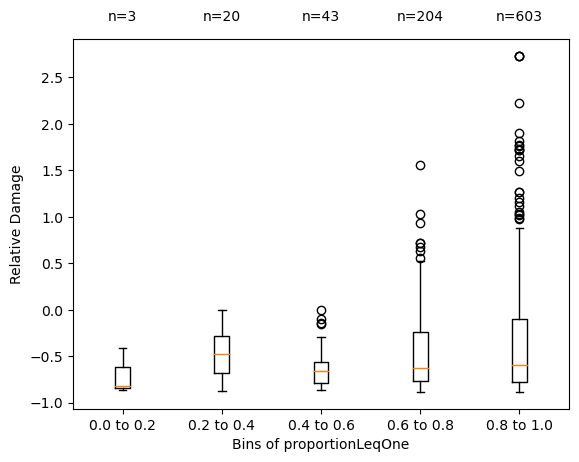

In [111]:
# Define the bin edges
bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1]

# Cut the data into bins
filtered_df['bins'] = pd.cut(filtered_df['proportionLeqOne'], bins=bin_edges)

# Group the data by the bins
grouped_data = filtered_df.groupby('bins')

# Create a figure and axis for the boxplots
fig, ax = plt.subplots()

# Create a list to store the positions of each boxplot
positions = []

# Store the labels for the bins
bin_labels = []

# Iterate over the groups and create boxplots
for i, (group, data) in enumerate(grouped_data):
    positions.append(i+1)
    # count the number of observations in the bin
    num_observations = len(data)
    # create the label for the bin
    bin_label = f'{group.left:.1f} to {group.right:.1f}'
    bin_labels.append(bin_label)
    ax.boxplot(data['relativeDamage'], positions=[i+1])

    # Annotate number of observations at the very top of the figure
    ax.text(i+1, 1.05, f'n={num_observations}', ha='center', transform=ax.get_xaxis_transform())

# Set the x-axis labels
ax.set_xticks(positions)
ax.set_xticklabels(bin_labels)

# Set the x-axis label
ax.set_xlabel('Bins of proportionLeqOne')

# Set the y-axis label
ax.set_ylabel('Relative Damage')

# Show the plot
plt.show()

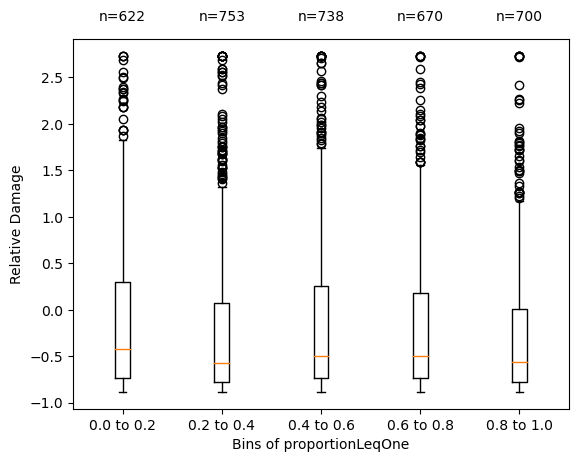

In [112]:
# Define the bin edges
bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1]

# Cut the data into bins
df_copy_1ft_encoded['bins'] = pd.cut(df_copy_1ft_encoded['proportionLeqOne'], bins=bin_edges)

# Group the data by the bins
grouped_data = df_copy_1ft_encoded.groupby('bins')

# Create a figure and axis for the boxplots
fig, ax = plt.subplots()

# Create a list to store the positions of each boxplot
positions = []

# Store the labels for the bins
bin_labels = []

# Iterate over the groups and create boxplots
for i, (group, data) in enumerate(grouped_data):
    positions.append(i+1)
    # count the number of observations in the bin
    num_observations = len(data)
    # create the label for the bin
    bin_label = f'{group.left:.1f} to {group.right:.1f}'
    bin_labels.append(bin_label)
    ax.boxplot(data['relativeDamage'], positions=[i+1])

    # Annotate number of observations at the very top of the figure
    ax.text(i+1, 1.05, f'n={num_observations}', ha='center', transform=ax.get_xaxis_transform())

# Set the x-axis labels
ax.set_xticks(positions)
ax.set_xticklabels(bin_labels)

# Set the x-axis label
ax.set_xlabel('Bins of proportionLeqOne')

# Set the y-axis label
ax.set_ylabel('Relative Damage')

# Show the plot
plt.show()

### Autoencoder

In [74]:
from pyod.models.auto_encoder import AutoEncoder

atcdr = AutoEncoder(contamination=0.1, hidden_neurons =[256, 128, 64, 32, 64, 128, 256])
atcdr.fit(df_6ft)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 393)               154842    
                                                                 
 dropout_4 (Dropout)         (None, 393)               0         
                                                                 
 dense_6 (Dense)             (None, 393)               154842    
                                                                 
 dropout_5 (Dropout)         (None, 393)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               100864    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)              

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=100,
      hidden_activation='relu',
      hidden_neurons=[256, 128, 64, 32, 64, 128, 256], l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x000001D064B0B8B0>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [75]:
y_train_scores = atcdr.decision_function(df_6ft)
y_train_pred = atcdr.predict(df_6ft)

1094/1094 [==============================] - 2s 2ms/step


In [76]:

# Threshold for the defined comtanimation rate
print("The threshold for the defined contamination rate:" , atcdr.threshold_)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic. 
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_train_pred))

The threshold for the defined contamination rate: 26.302903380684246
The training data: {0: 31482, 1: 3498}


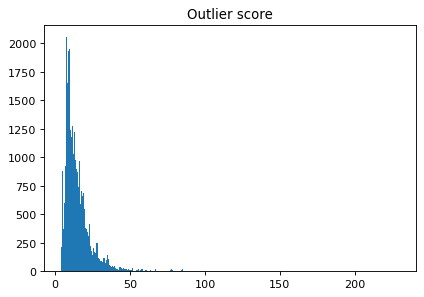

In [77]:
plt.figure(figsize=(6, 4), dpi=80)
import matplotlib.pyplot as plt
plt.hist(y_train_scores, bins='auto') # arguments are passed to np.histogram
plt.title("Outlier score")
plt.show()

In [78]:
threshold = atcdr.threshold_ # Or other value from the above histogram

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df_6ft.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(df_6ft,y_train_scores, threshold)

,Group,Count,Count %,relativeDamage,AgeofBuildinguntilflood,postFIRMConstructionIndicator,elevatedBuildingIndicator,proportionLeqOne,bool75,bool50,bool80,bool90,medWaterDepth,floodEvent_2021 Mid-Spring Severe Storms,floodEvent_Arizona Burn Scar Flash Flooding,floodEvent_Blizzard of 1993,floodEvent_California Atmospheric River,floodEvent_Colorado Burn Scar Flash Flooding,floodEvent_Dallas Flash Floods,floodEvent_Death Valley Flash Floods,floodEvent_December Storm - Nor'easter,floodEvent_Early summer severe storms,floodEvent_Early summer storms,floodEvent_Early winter storms,floodEvent_Fall 2018 Texas Flooding,floodEvent_Fall severe storms,floodEvent_Flooding,floodEvent_Greater New Orleans Flooding,floodEvent_Heavy rains,floodEvent_Hurricane Alex,floodEvent_Hurricane Alicia,floodEvent_Hurricane Allen,floodEvent_Hurricane Andrew,floodEvent_Hurricane Bertha,floodEvent_Hurricane Bob,floodEvent_Hurricane Bonnie,floodEvent_Hurricane Chantel,floodEvent_Hurricane Charley,floodEvent_Hurricane Cindy,floodEvent_Hurricane Claudette,floodEvent_Hurricane Danielle,floodEvent_Hurricane Danny,floodEvent_Hurricane Delta,floodEvent_Hurricane Dennis,floodEvent_Hurricane Diana,floodEvent_Hurricane Dolly,floodEvent_Hurricane Earl,floodEvent_Hurricane Elena,floodEvent_Hurricane Elsa,floodEvent_Hurricane Emily,floodEvent_Hurricane Eta,floodEvent_Hurricane Fiona,floodEvent_Hurricane Florence,floodEvent_Hurricane Floyd,floodEvent_Hurricane Fran,floodEvent_Hurricane Frances,floodEvent_Hurricane Frederic,floodEvent_Hurricane Georges,floodEvent_Hurricane Georges (Keys),floodEvent_Hurricane Georges (Panhandle),floodEvent_Hurricane Gilbert,floodEvent_Hurricane Gloria,floodEvent_Hurricane Gordon,floodEvent_Hurricane Gustav,floodEvent_Hurricane Hanna,floodEvent_Hurricane Harvey,floodEvent_Hurricane Hermine,floodEvent_Hurricane Hortense,floodEvent_Hurricane Hugo,floodEvent_Hurricane Ian,floodEvent_Hurricane Ida,floodEvent_Hurricane Ike,floodEvent_Hurricane Iniki,floodEvent_Hurricane Irene,floodEvent_Hurricane Irma,floodEvent_Hurricane Isaac,floodEvent_Hurricane Isabel,floodEvent_Hurricane Isaias,floodEvent_Hurricane Iselle,floodEvent_Hurricane Ivan,floodEvent_Hurricane Jeanne,floodEvent_Hurricane Jerry,floodEvent_Hurricane Josephine,floodEvent_Hurricane Juan,floodEvent_Hurricane Kate,floodEvent_Hurricane Katrina,floodEvent_Hurricane Lane,floodEvent_Hurricane Laura,floodEvent_Hurricane Lili,floodEvent_Hurricane Maria,floodEvent_Hurricane Marilyn,floodEvent_Hurricane Matthew,floodEvent_Hurricane Michael,floodEvent_Hurricane Nicole,floodEvent_Hurricane Opal,floodEvent_Hurricane Ophelia,floodEvent_Hurricane Rita,floodEvent_Hurricane Sally,floodEvent_Hurricane Sandy,floodEvent_Hurricane Wilma,floodEvent_Hurricane Zeta,floodEvent_Hurricanes David & Frederic,floodEvent_Late July Flooding,floodEvent_Late spring severe storms,floodEvent_Late spring storms,floodEvent_Late summer storms,floodEvent_Late winter severe storms,floodEvent_Late winter storms,floodEvent_Low pressure system,floodEvent_March 2019 Midwest Flooding,floodEvent_March storm,floodEvent_Mid-Winter California Flooding,floodEvent_Mid-spring storms,floodEvent_Mid-summer severe storms,floodEvent_Midwest Flooding,floodEvent_Nor'easter,floodEvent_Not a named storm,floodEvent_October severe storms,floodEvent_Pineapple Express - Southern,floodEvent_Severe Storms and Flooding,floodEvent_Severe flooding,floodEvent_Spring Storm,floodEvent_Spring severe storms,floodEvent_Spring storm,floodEvent_Storm,floodEvent_Summer severe storms,floodEvent_Tennessee Flash Flooding,floodEvent_Tennessee Flooding,floodEvent_Texas Severe Winter Storms,"floodEvent_The ""Halloween"" Storm",floodEvent_The 'No-Name Storm',floodEvent_Thunderstorms,floodEvent_Torrential Rain,floodEvent_Torrential rain,floodEvent_Tropical Storm Alberto,floodEvent_Tropical Storm Alex,floodEvent_Tropical Storm Allison,floodEvent_Tropical Storm Barry,floodEvent_Tropical Storm Beta,floodEvent_Tropical Storm Bill,floodEvent_Tropical Storm Claudette,floodEvent_Tr

In [79]:
mask = y_train_pred == 1

mask_inliers = y_train_pred == 0

# Apply the mask to filter the DataFrame
filtered_df = df_copy_6ft[mask]

filtered_df_inliers = df_copy_6ft[mask_inliers]

In [80]:
filtered_df['relativeDamage'].mean()

0.25572825652551584

In [81]:
filtered_df['proportionLeqOne'].median()

0.358974358974359

In [82]:
filtered_df_inliers['relativeDamage'].mean()

0.4067523444503544

In [83]:
df_copy_6ft['relativeDamage'].mean()

0.39164993565787054

In [84]:
df_copy_6ft['proportionLeqOne'].mean()

0.2787304040193301

C:\Users\Asus\AppData\Local\Temp\ipykernel_7724\1138495859.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['bins'] = pd.cut(filtered_df['proportionLeqOne'], bins=bin_edges)


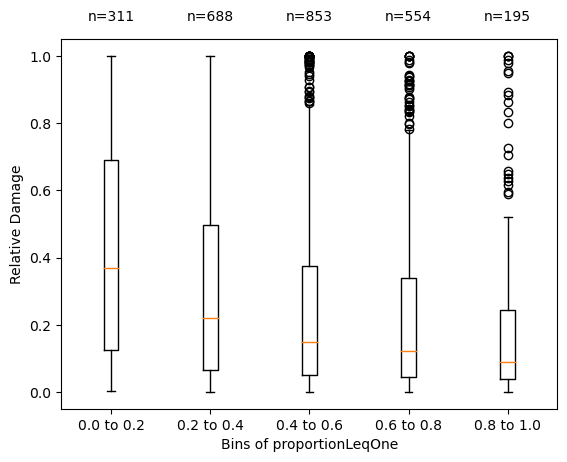

In [85]:
# Define the bin edges
bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1]

# Cut the data into bins
filtered_df['bins'] = pd.cut(filtered_df['proportionLeqOne'], bins=bin_edges)

# Group the data by the bins
grouped_data = filtered_df.groupby('bins')

# Create a figure and axis for the boxplots
fig, ax = plt.subplots()

# Create a list to store the positions of each boxplot
positions = []

# Store the labels for the bins
bin_labels = []

# Iterate over the groups and create boxplots
for i, (group, data) in enumerate(grouped_data):
    positions.append(i+1)
    # count the number of observations in the bin
    num_observations = len(data)
    # create the label for the bin
    bin_label = f'{group.left:.1f} to {group.right:.1f}'
    bin_labels.append(bin_label)
    ax.boxplot(data['relativeDamage'], positions=[i+1])

    # Annotate number of observations at the very top of the figure
    ax.text(i+1, 1.05, f'n={num_observations}', ha='center', transform=ax.get_xaxis_transform())

# Set the x-axis labels
ax.set_xticks(positions)
ax.set_xticklabels(bin_labels)

# Set the x-axis label
ax.set_xlabel('Bins of proportionLeqOne')

# Set the y-axis label
ax.set_ylabel('Relative Damage')

# Show the plot
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_7724\1852511065.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_inliers['bins'] = pd.cut(filtered_df_inliers['proportionLeqOne'], bins=bin_edges)


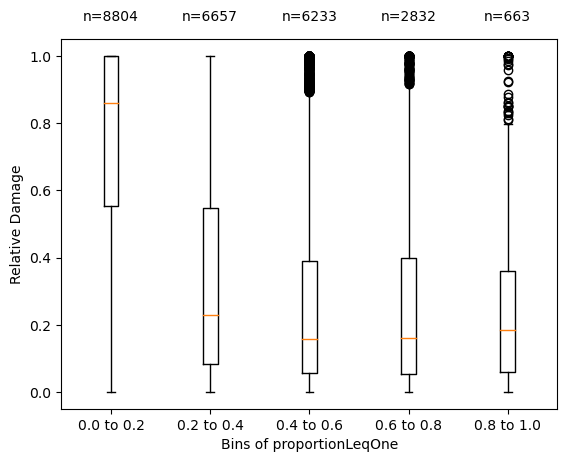

In [86]:
# Define the bin edges
bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1]

# Cut the data into bins
filtered_df_inliers['bins'] = pd.cut(filtered_df_inliers['proportionLeqOne'], bins=bin_edges)

# Group the data by the bins
grouped_data = filtered_df_inliers.groupby('bins')

# Create a figure and axis for the boxplots
fig, ax = plt.subplots()

# Create a list to store the positions of each boxplot
positions = []

# Store the labels for the bins
bin_labels = []

# Iterate over the groups and create boxplots
for i, (group, data) in enumerate(grouped_data):
    positions.append(i+1)
    # count the number of observations in the bin
    num_observations = len(data)
    # create the label for the bin
    bin_label = f'{group.left:.1f} to {group.right:.1f}'
    bin_labels.append(bin_label)
    ax.boxplot(data['relativeDamage'], positions=[i+1])

    # Annotate number of observations at the very top of the figure
    ax.text(i+1, 1.05, f'n={num_observations}', ha='center', transform=ax.get_xaxis_transform())

# Set the x-axis labels
ax.set_xticks(positions)
ax.set_xticklabels(bin_labels)

# Set the x-axis label
ax.set_xlabel('Bins of proportionLeqOne')

# Set the y-axis label
ax.set_ylabel('Relative Damage')

# Show the plot
plt.show()

In [116]:
df_copy_1ft_encoded = df_encoded[(df_encoded['waterDepth'] == 1) | (df_encoded['waterDepth'] == 0)].copy()
df_copy_1ft_encoded.drop(['waterDepth'], axis=1, inplace=True)


df_copy_1ft_encoded = df_copy_1ft_encoded.sample(n=10000, random_state=42)

df_copy_1ft_copy = df_copy_1ft_encoded.copy()

In [117]:
from sklearn.preprocessing import StandardScaler

# Specify the variables to normalize
variables_to_normalize = ['AgeofBuildinguntilflood', 'relativeDamage', 'proportionLeqOne',  'medWaterDepth']

# Normalize the variables
df_copy_1ft_copy[variables_to_normalize] = scaler.transform(df_copy_1ft_copy[variables_to_normalize])

In [118]:
y_train_pred = atcdr.predict(df_copy_1ft_copy)

313/313 [==============================] - 1s 2ms/step


In [119]:
np.count_nonzero(y_train_pred == 1)/10000

0.2042

In [120]:
len(y_train_pred)

10000

In [103]:
mask = y_train_pred == 1

mask_inliers = y_train_pred == 0

# Apply the mask to filter the DataFrame
filtered_df = df_copy_1ft_encoded[mask]

filtered_df_inliers = df_copy_1ft_encoded[mask_inliers]

In [122]:
filtered_df.shape[0]

2039

In [123]:
filtered_df_inliers.shape[0]

7961

C:\Users\Asus\AppData\Local\Temp\ipykernel_7724\1138495859.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['bins'] = pd.cut(filtered_df['proportionLeqOne'], bins=bin_edges)


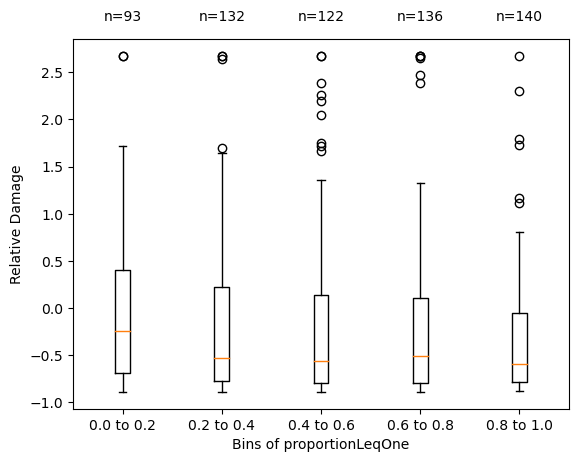

In [104]:
# Define the bin edges
bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1]

# Cut the data into bins
filtered_df['bins'] = pd.cut(filtered_df['proportionLeqOne'], bins=bin_edges)

# Group the data by the bins
grouped_data = filtered_df.groupby('bins')

# Create a figure and axis for the boxplots
fig, ax = plt.subplots()

# Create a list to store the positions of each boxplot
positions = []

# Store the labels for the bins
bin_labels = []

# Iterate over the groups and create boxplots
for i, (group, data) in enumerate(grouped_data):
    positions.append(i+1)
    # count the number of observations in the bin
    num_observations = len(data)
    # create the label for the bin
    bin_label = f'{group.left:.1f} to {group.right:.1f}'
    bin_labels.append(bin_label)
    ax.boxplot(data['relativeDamage'], positions=[i+1])

    # Annotate number of observations at the very top of the figure
    ax.text(i+1, 1.05, f'n={num_observations}', ha='center', transform=ax.get_xaxis_transform())

# Set the x-axis labels
ax.set_xticks(positions)
ax.set_xticklabels(bin_labels)

# Set the x-axis label
ax.set_xlabel('Bins of proportionLeqOne')

# Set the y-axis label
ax.set_ylabel('Relative Damage')

# Show the plot
plt.show()

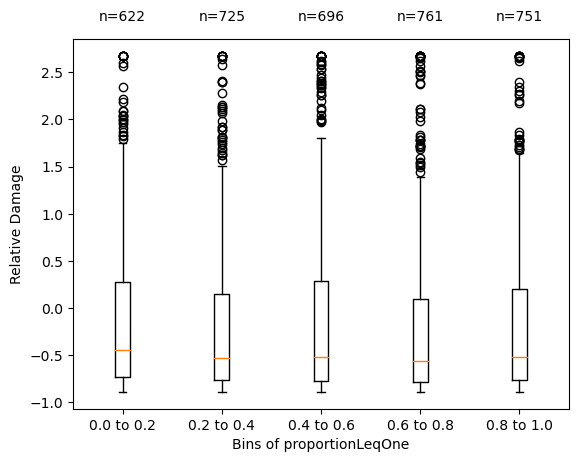

In [106]:
# Define the bin edges
bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1]

# Cut the data into bins
df_copy_1ft_encoded['bins'] = pd.cut(df_copy_1ft_encoded['proportionLeqOne'], bins=bin_edges)

# Group the data by the bins
grouped_data = df_copy_1ft_encoded.groupby('bins')

# Create a figure and axis for the boxplots
fig, ax = plt.subplots()

# Create a list to store the positions of each boxplot
positions = []

# Store the labels for the bins
bin_labels = []

# Iterate over the groups and create boxplots
for i, (group, data) in enumerate(grouped_data):
    positions.append(i+1)
    # count the number of observations in the bin
    num_observations = len(data)
    # create the label for the bin
    bin_label = f'{group.left:.1f} to {group.right:.1f}'
    bin_labels.append(bin_label)
    ax.boxplot(data['relativeDamage'], positions=[i+1])

    # Annotate number of observations at the very top of the figure
    ax.text(i+1, 1.05, f'n={num_observations}', ha='center', transform=ax.get_xaxis_transform())

# Set the x-axis labels
ax.set_xticks(positions)
ax.set_xticklabels(bin_labels)

# Set the x-axis label
ax.set_xlabel('Bins of proportionLeqOne')

# Set the y-axis label
ax.set_ylabel('Relative Damage')

# Show the plot
plt.show()

In [28]:
atcdr1 = AutoEncoder(contamination=0.05, hidden_neurons =[2, 2])
atcdr2 = AutoEncoder(contamination=0.05, hidden_neurons =[10, 2, 10])
atcdr3 = AutoEncoder(contamination=0.05, hidden_neurons =[15, 10, 2, 10, 15] )

In [ ]:
atcdr1.fit(df_6ft)
atcdr2.fit(df_6ft)
atcdr3.fit(df_6ft)

In [ ]:
# Store the results in each column:
train_scores[:, 0] = atcdr1.decision_function(df_6ft) 
train_scores[:, 1] = atcdr2.decision_function(df_6ft) 
train_scores[:, 2] = atcdr3.decision_function(df_6ft)
test_scores[:, 0] = atcdr1.decision_function(df_6ft) 
test_scores[:, 1] = atcdr2.decision_function(df_6ft) 
test_scores[:, 2] = atcdr3.decision_function(df_6ft)

In [ ]:
# Decision scores have to be normalized before combination
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

# Combination by average
y_train_by_average = average(train_scores_norm)
y_test_by_average = average(test_scores_norm)

In [ ]:
plt.figure(figsize=(6, 4), dpi=80)
import matplotlib.pyplot as plt
plt.hist(y_train_by_average, bins='auto') # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

In [ ]:
descriptive_stat_threshold(X_train,y_train_by_average, 0.0)